In [3]:
import assessmentModule as amod
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.signal as ss
%matplotlib inline
"""
For a subset of running LT assessments, try to predict
maximum time for [tHb] from polynomial fit to early
time (through end of Stage 4) data.

"""

__author__ = 'Todd Minehardt'


# Key type. Should be one of 'assessment', 'sweep', 'process',
# 'stat', 'device', 'warmup'.
key_type = 'process'

# Suffix for Matlab files. Should correspond to key.
matfile_suffix = '_' + key_type + '.mat'

# Define working directory where Matlab files are and output directory.
data_dir = '/Users/todd/data/WARMUP/RUN'
out_dir = '/Users/todd/data/WARMUP/RUN/tHb_predict_plots'

# List process files, get assessment IDs from them.
os.chdir(data_dir)

# Get list of LT assessment IDs from list.
aid_file = '/Users/todd/data/WARMUP/RUN/subset_runs_score_16-18.txt'
with open(aid_file, 'r') as fn:
    aid_list = []
    for line in fn:
        aid_list.append(line)
assessment_ids = [i.strip('\n') for i in aid_list]

# Build a dict keyed on assessment ID, containing all information
# from relevant Matlab files. This returns a dict of dicts.
data = {}
for assess_id in assessment_ids:
    data[assess_id] = amod.getMatlabData(assess_id + matfile_suffix)

# Plot parameters.
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['legend.loc'] = 'best'

# Tags are keys of interest.
tags = ['HR', 'SmO2', 'tHb']

# Define start and end indices for data arrays.
start_idx = 161
end_idx = None

/Users/todd/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


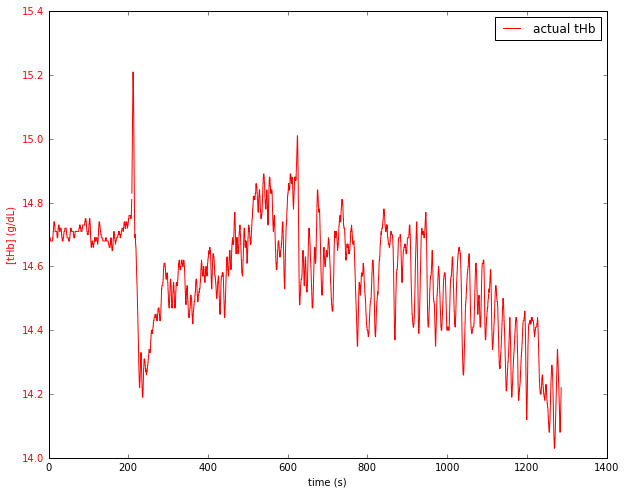

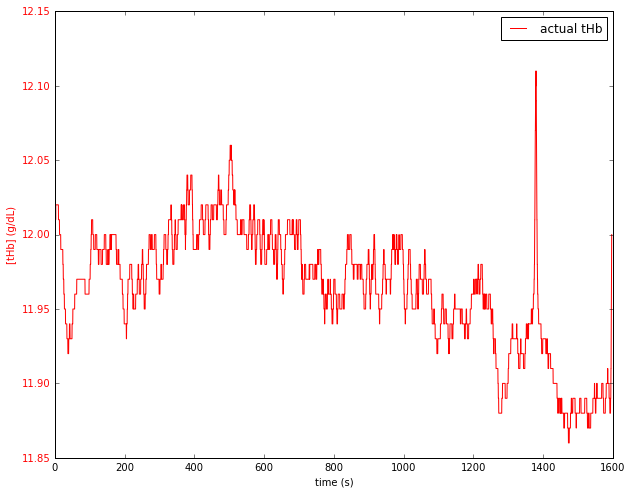

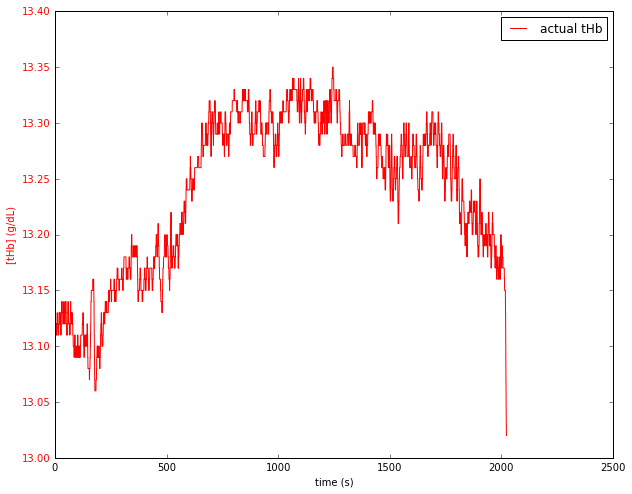

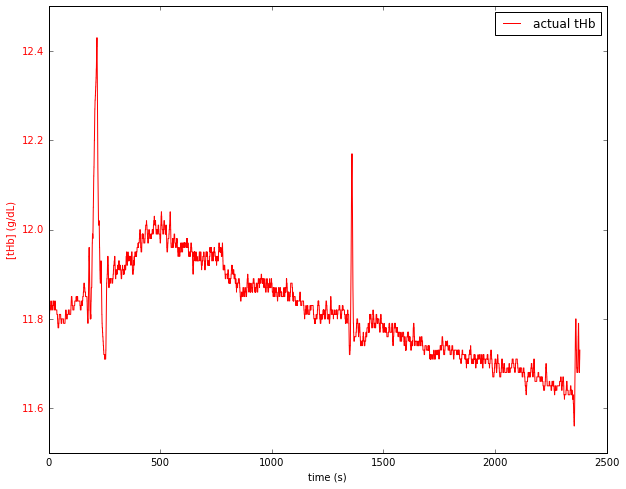

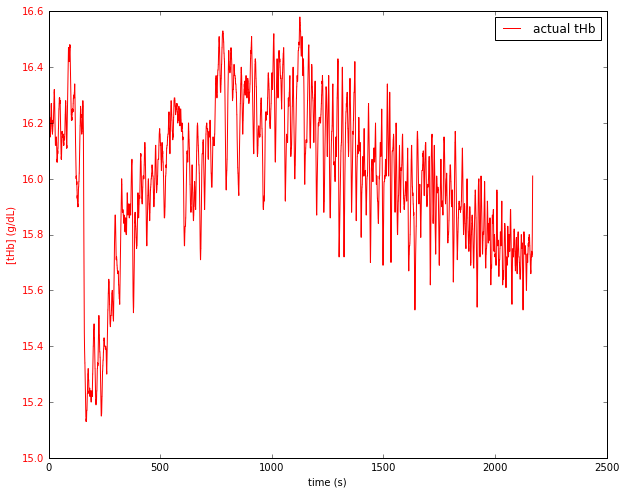

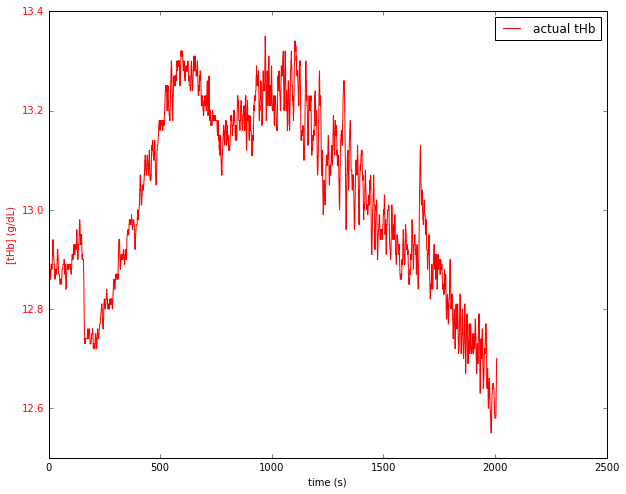

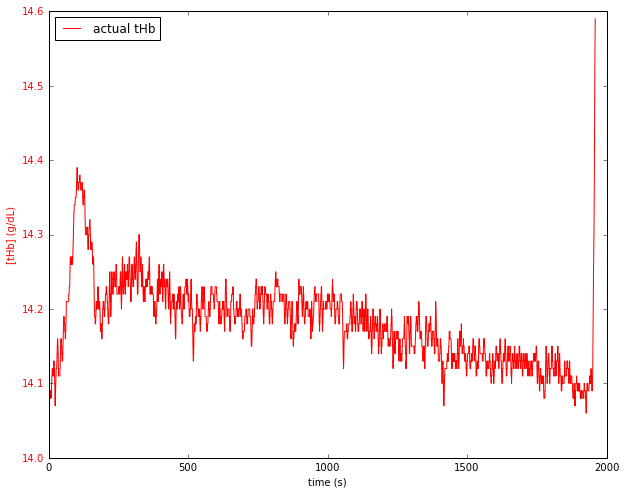

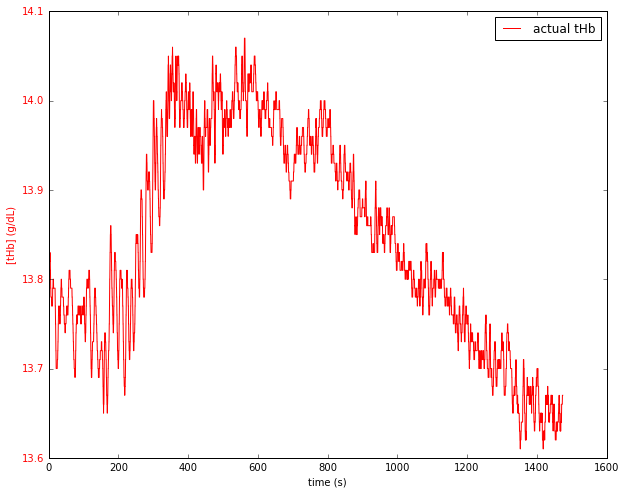

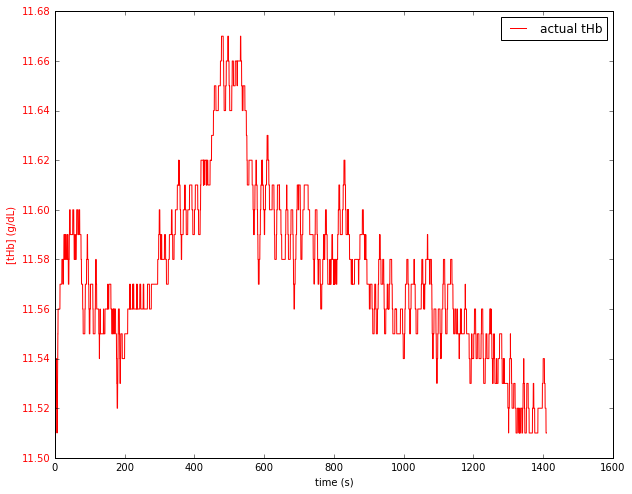

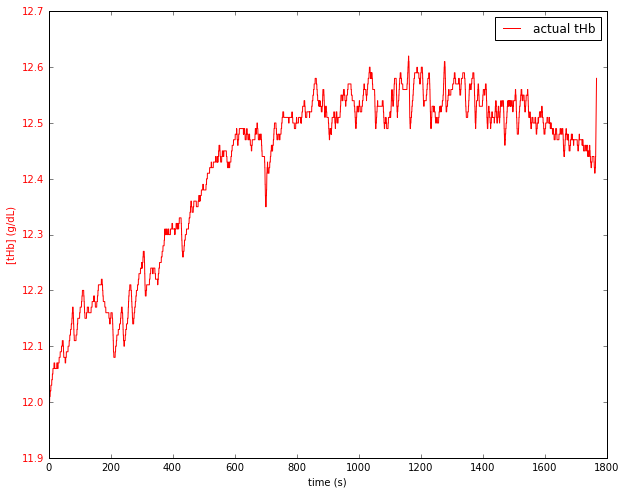

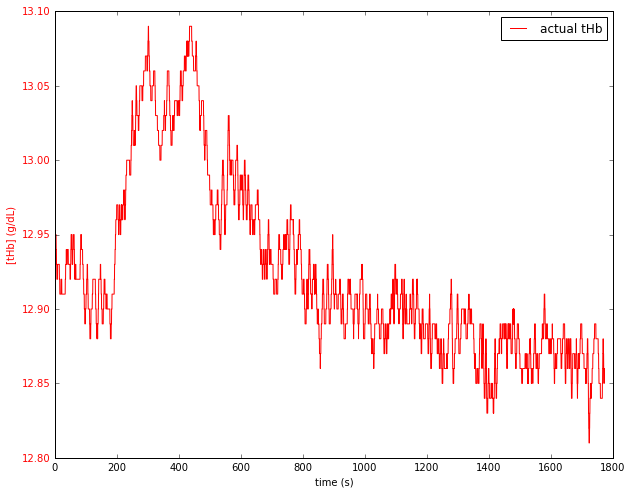

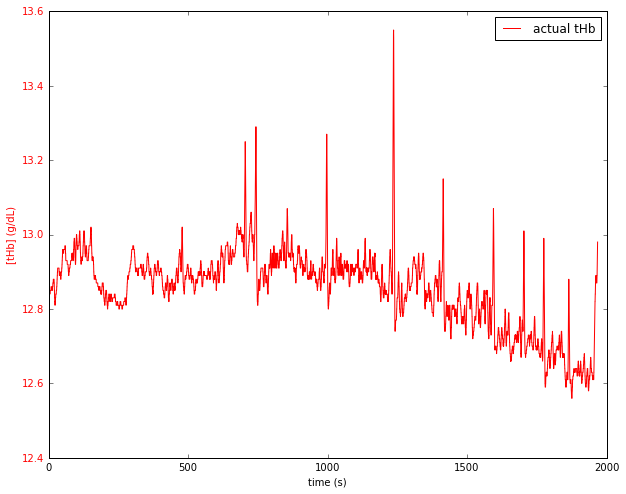

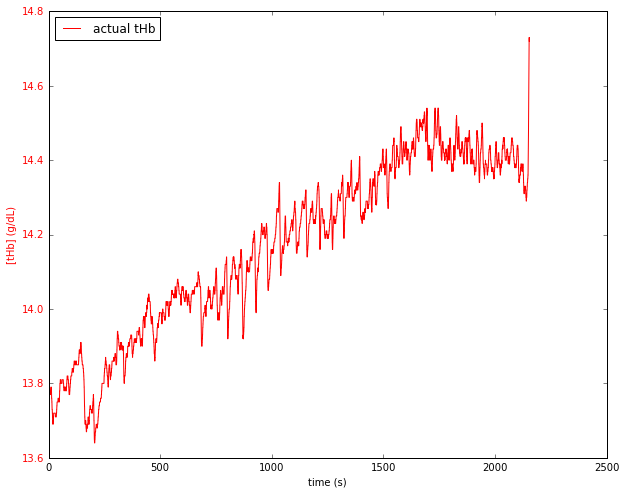

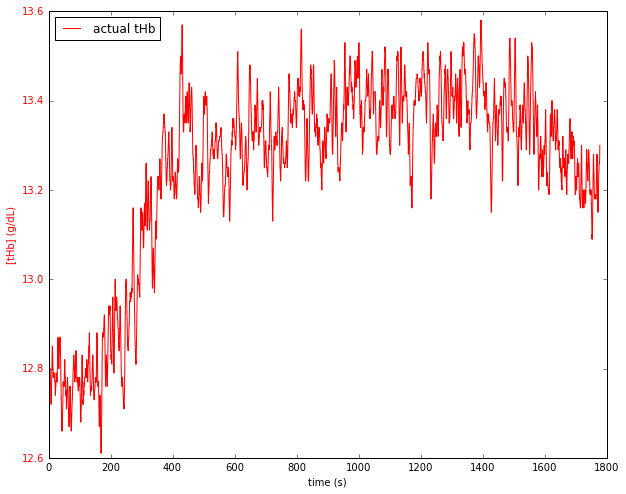

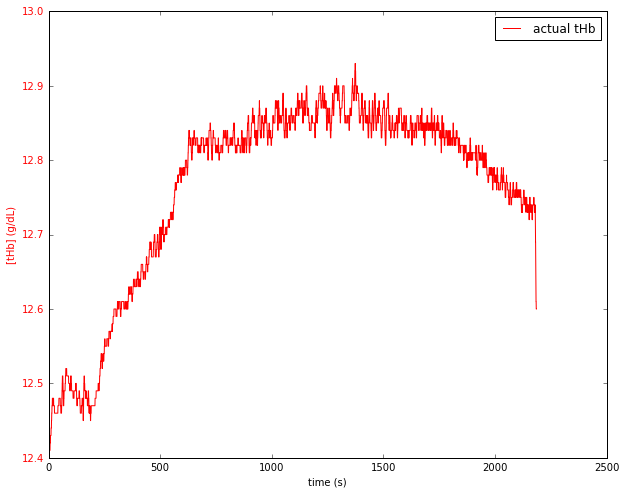

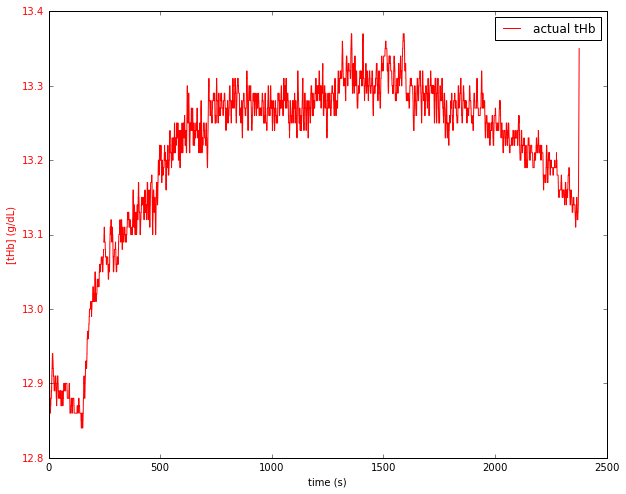

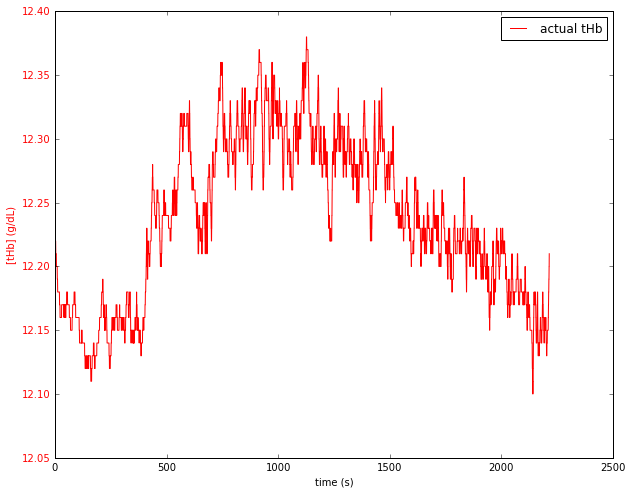

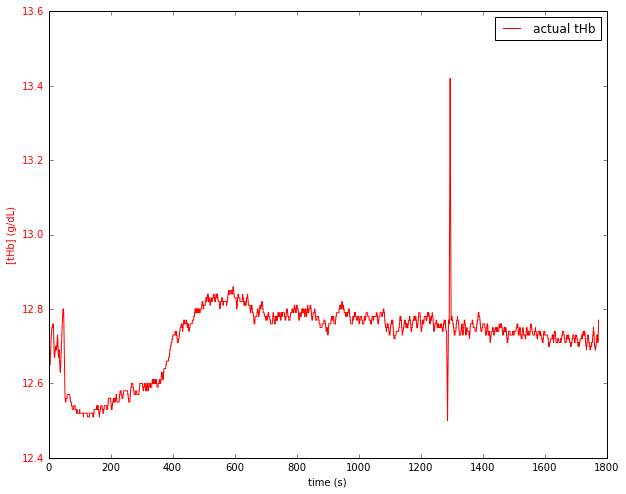

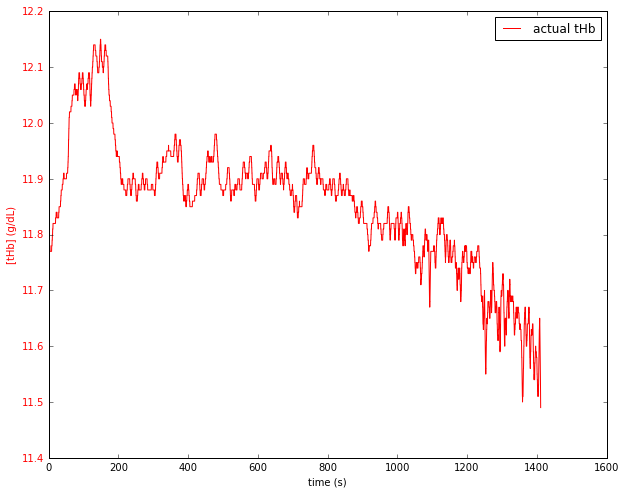

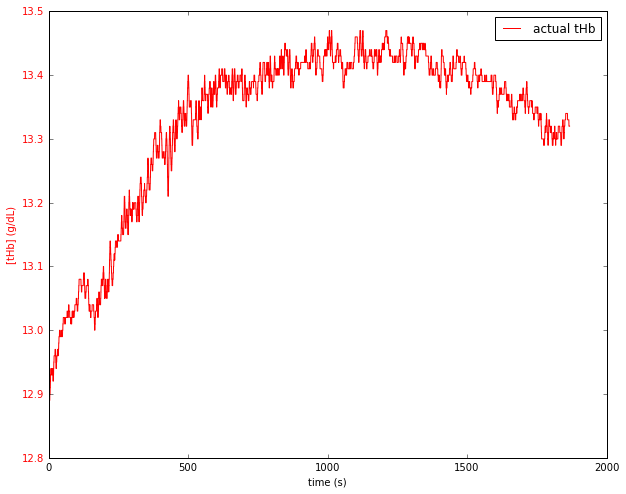

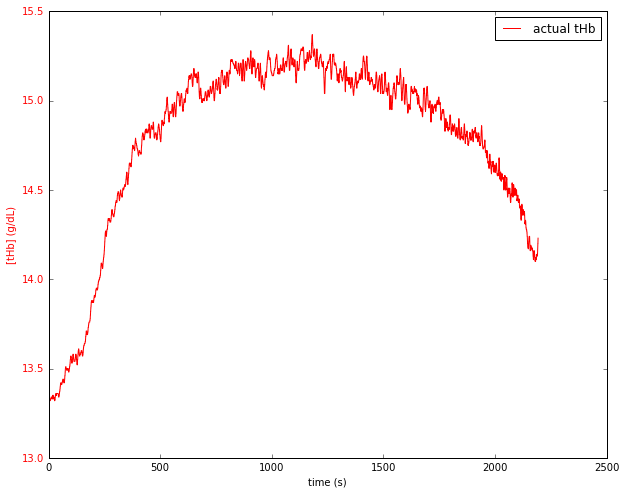

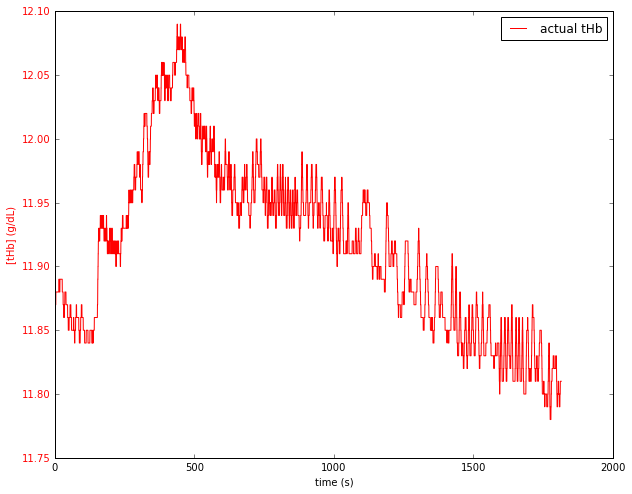

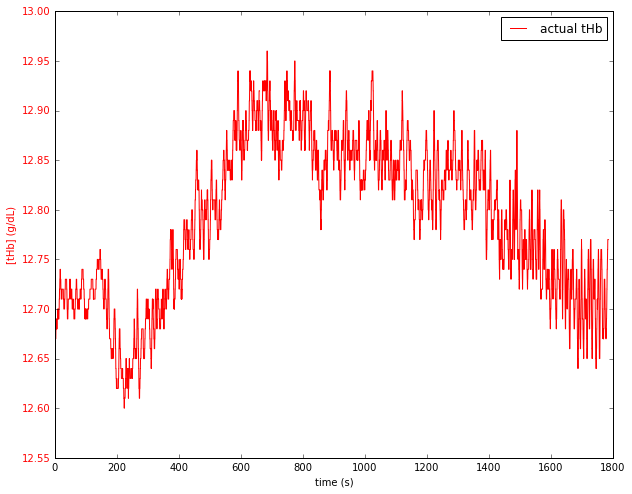

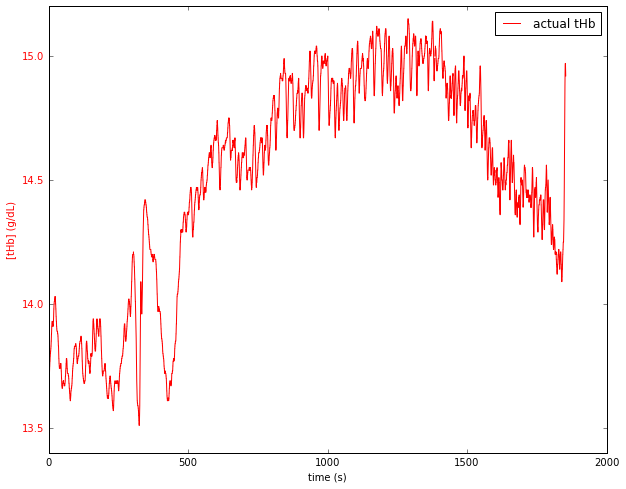

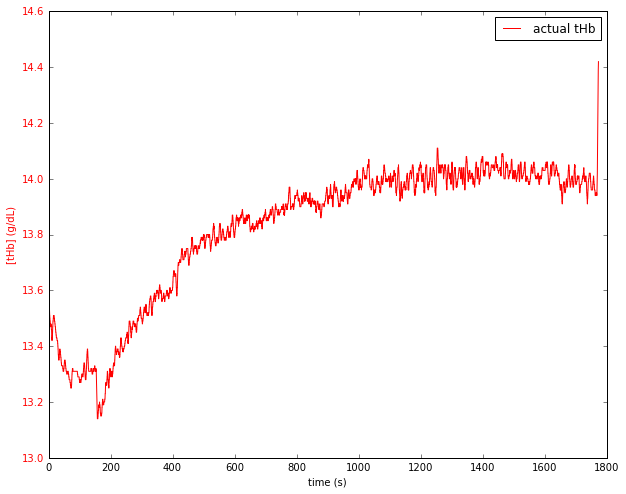

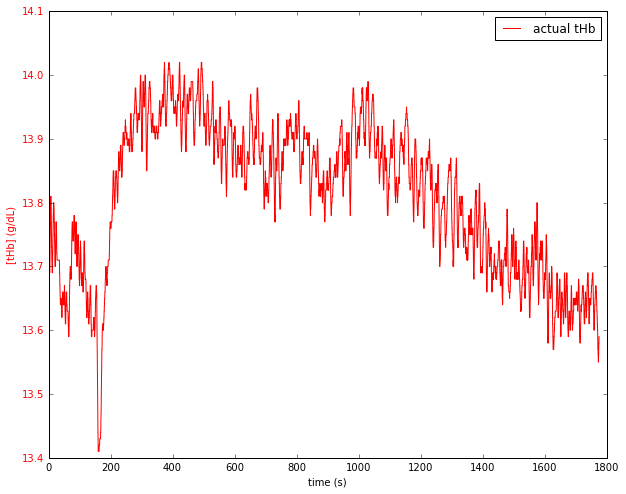

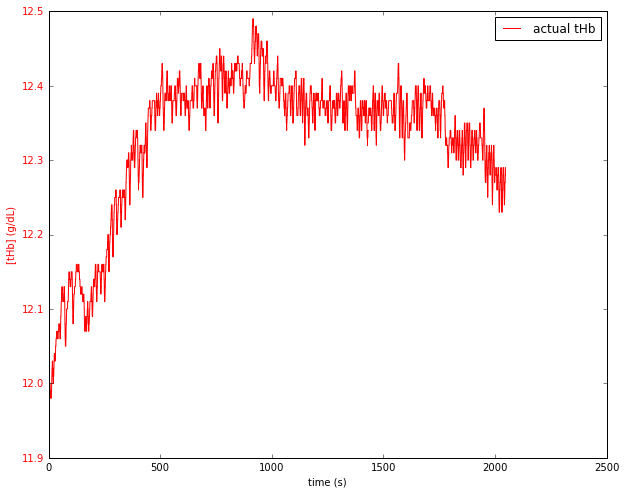

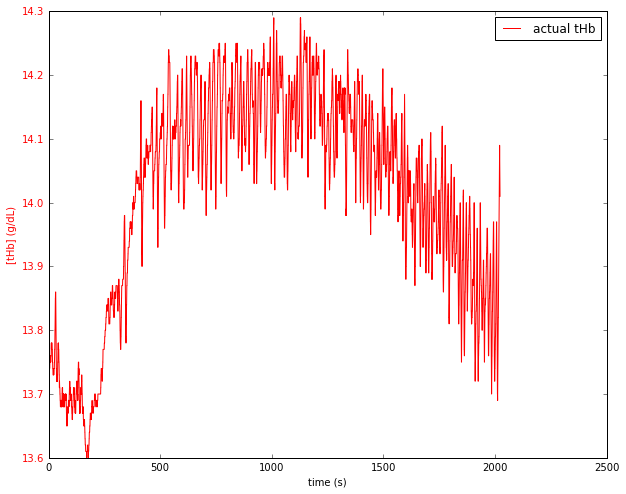

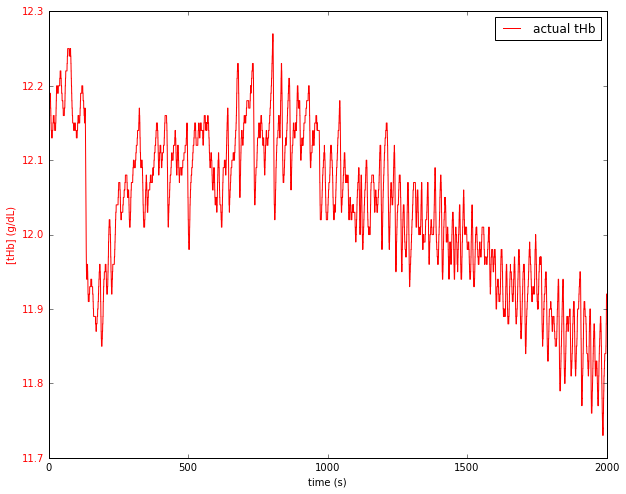

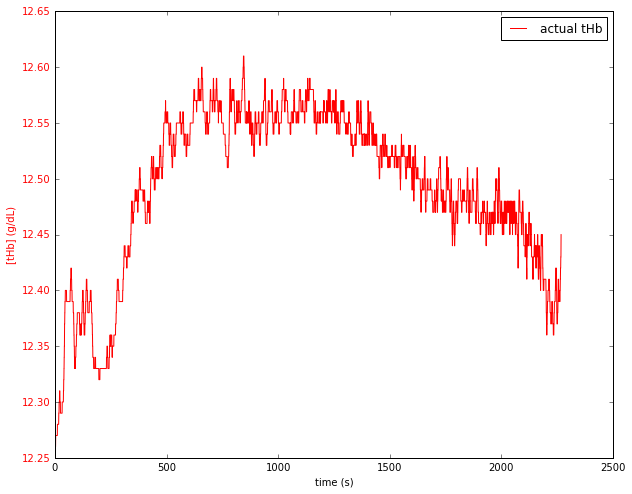

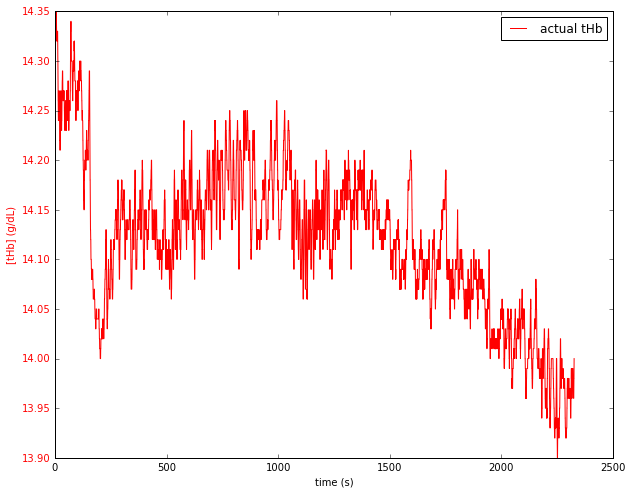

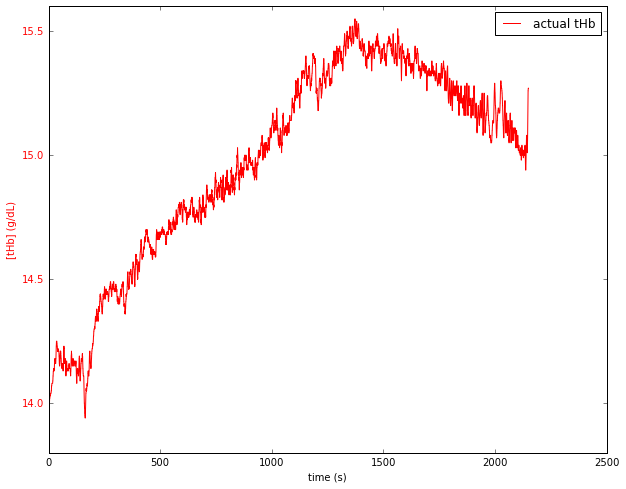

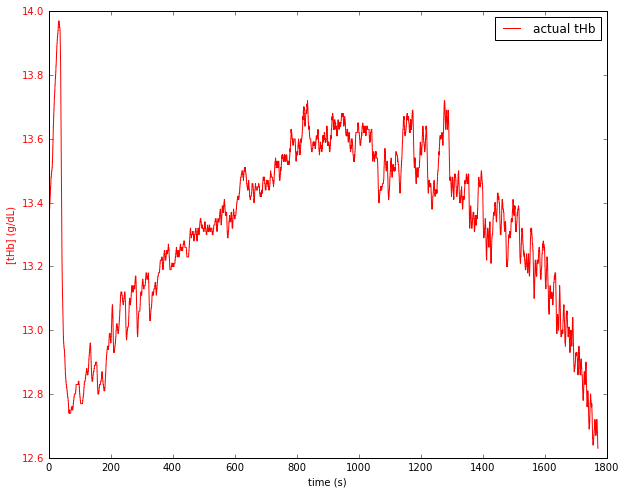

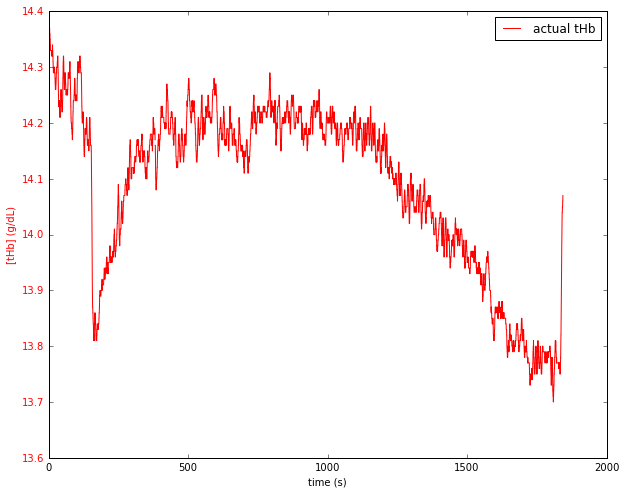

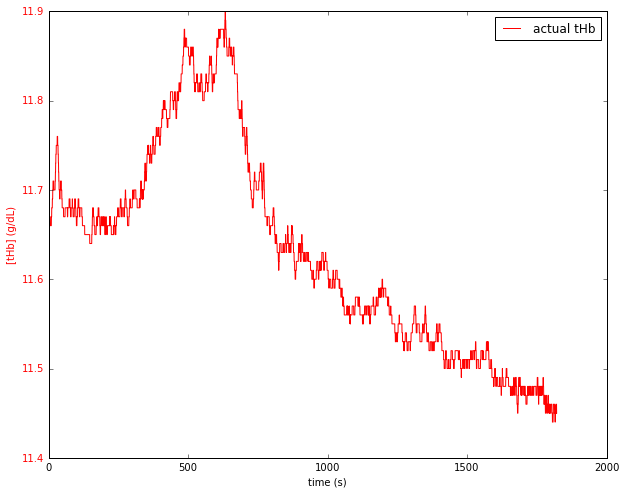

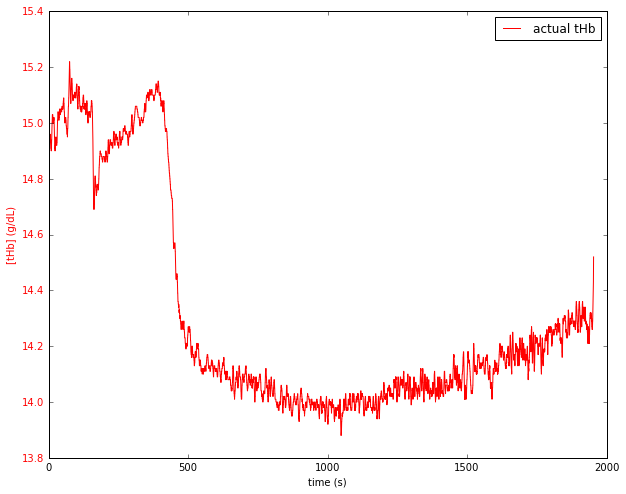

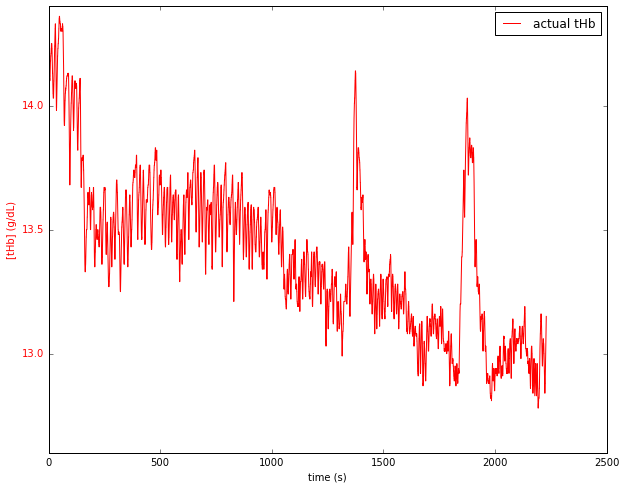

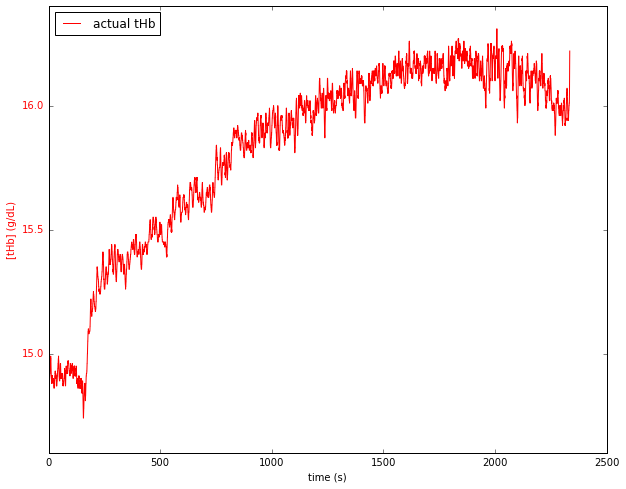

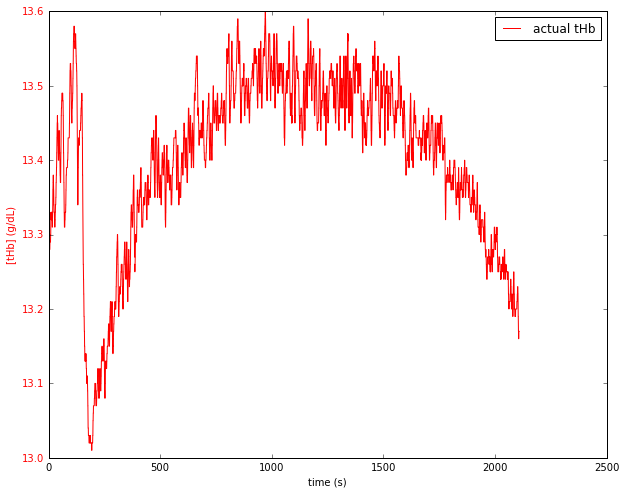

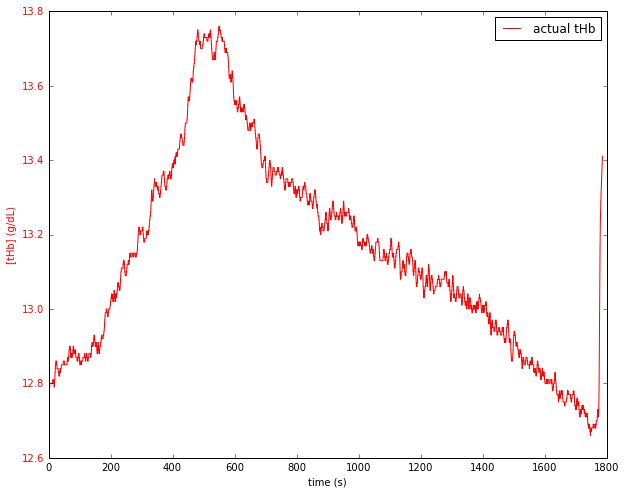

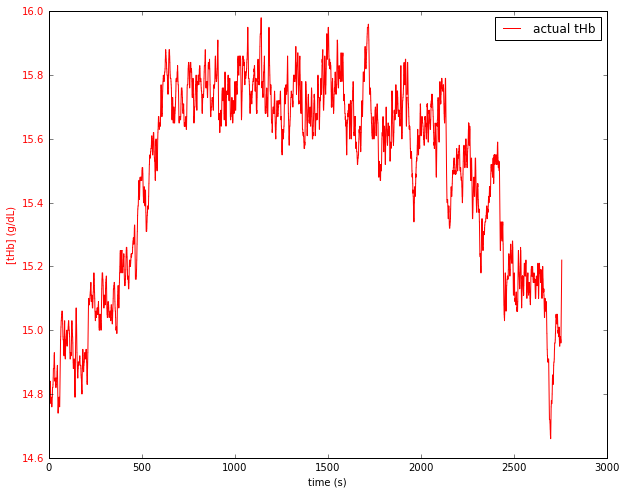

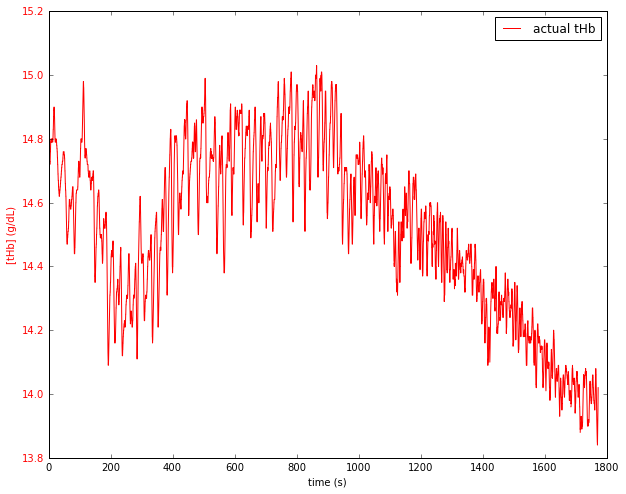

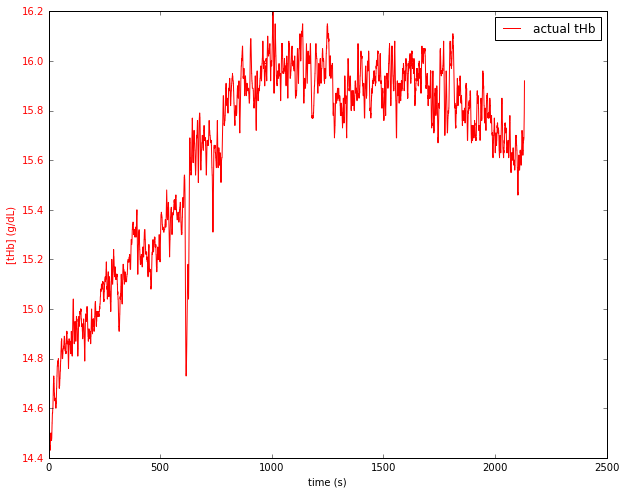

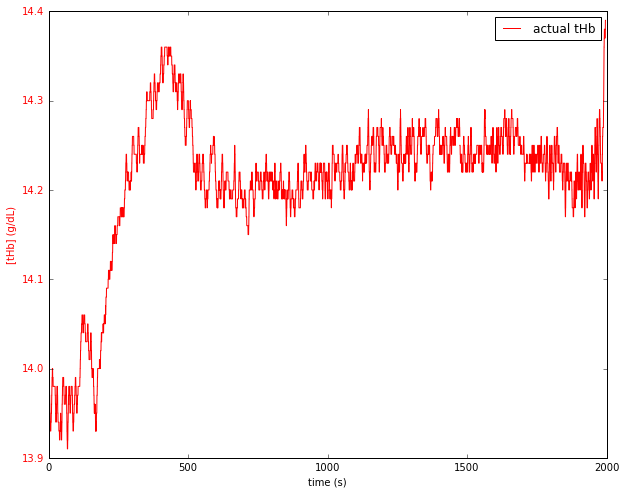

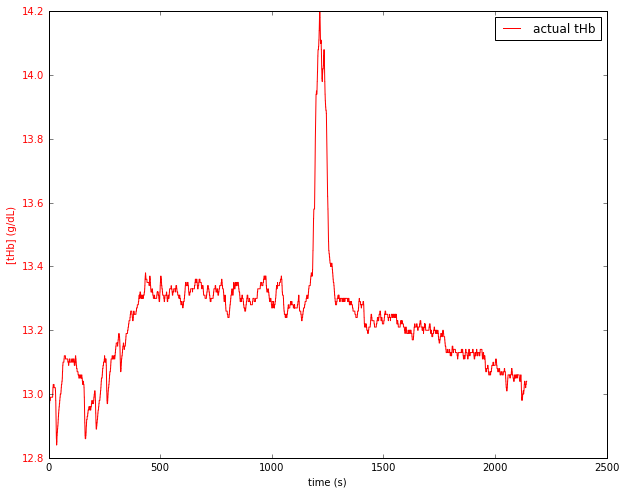

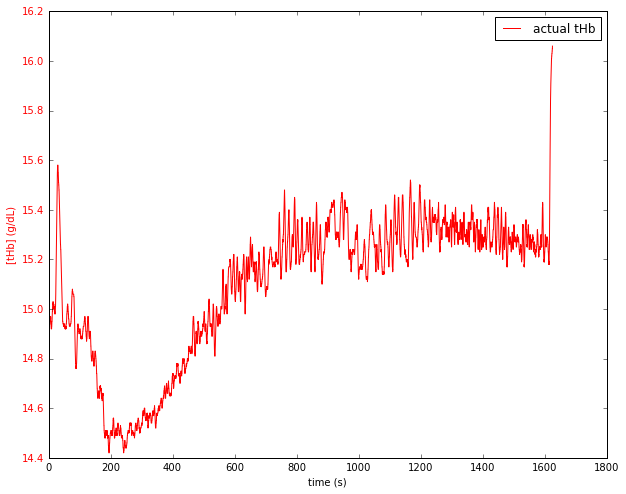

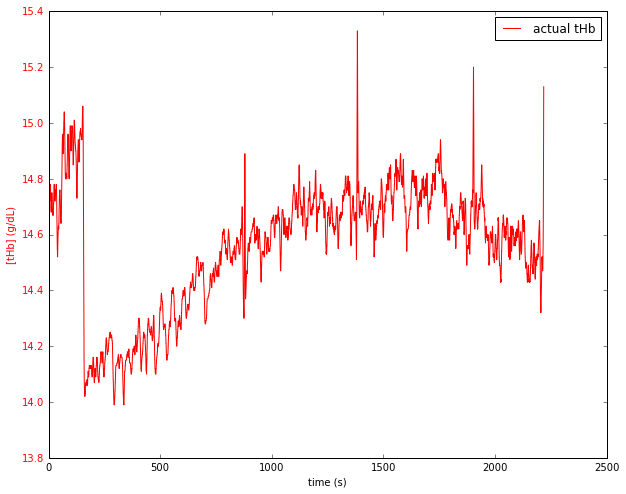

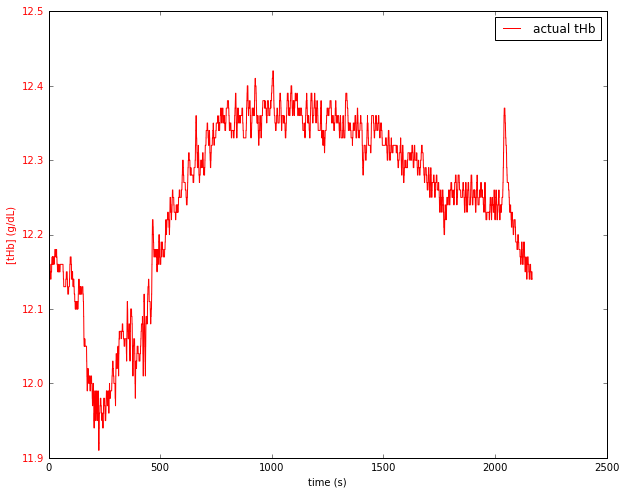

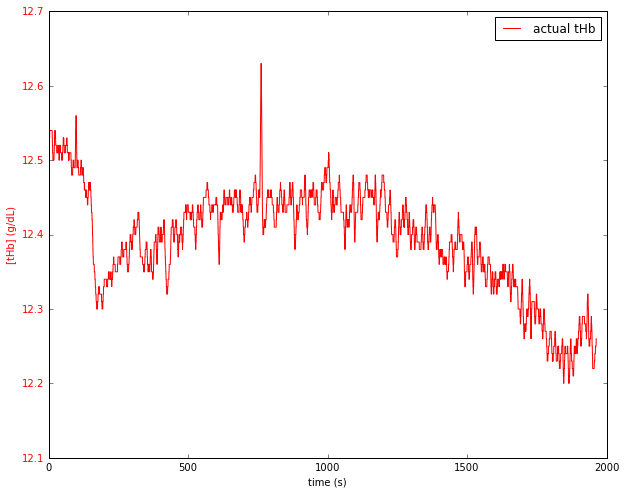

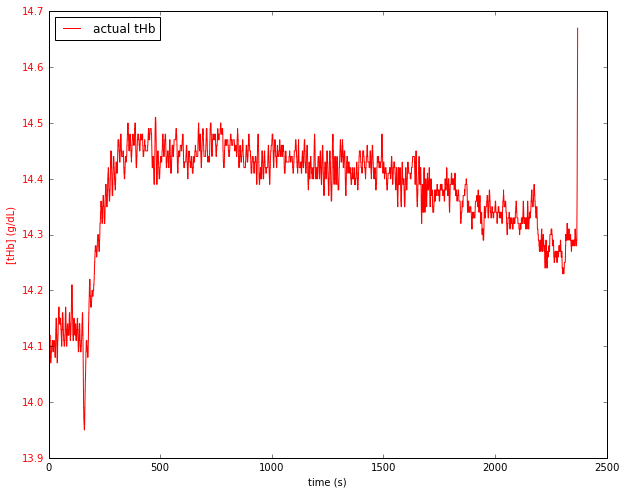

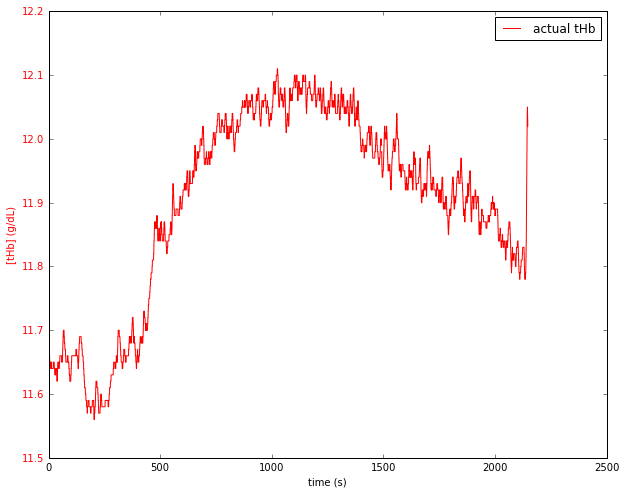

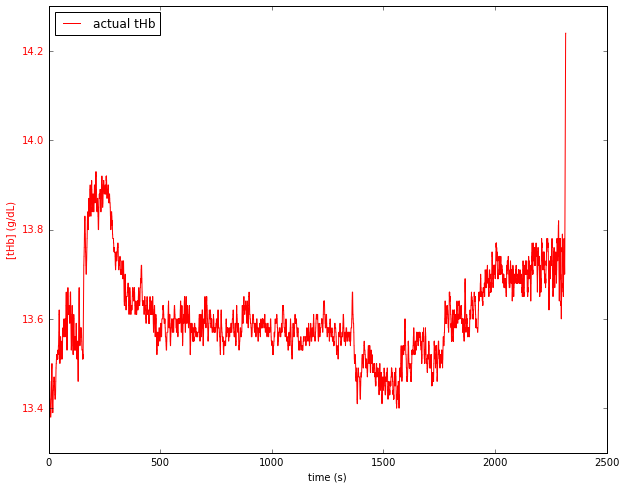

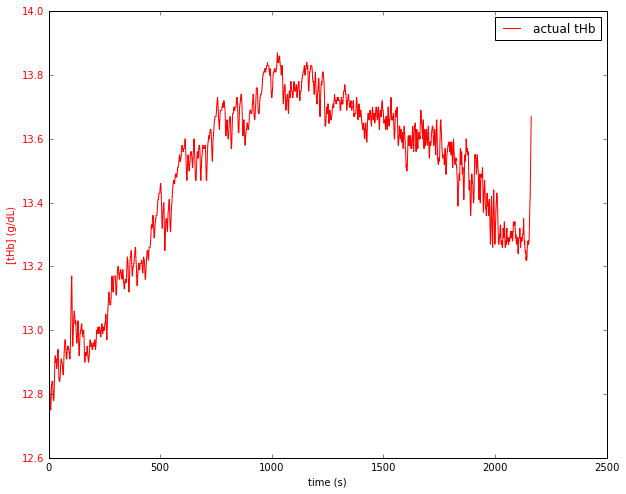

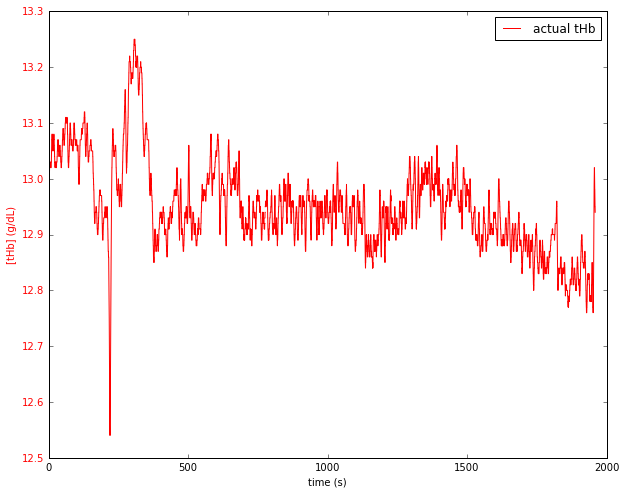

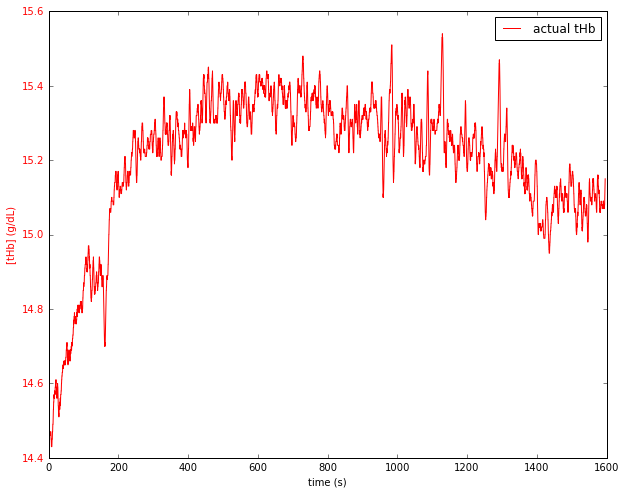

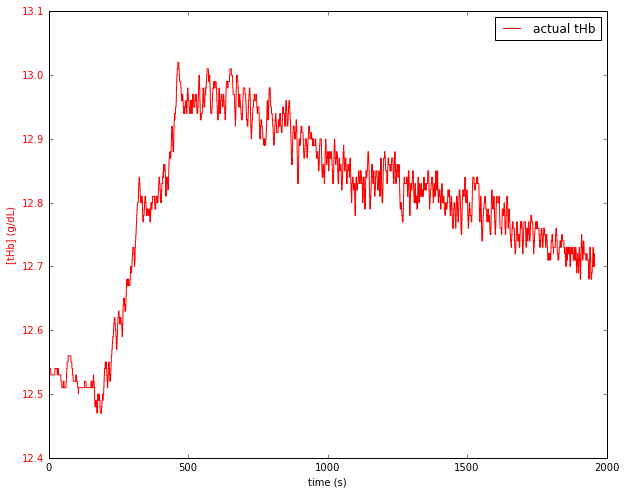

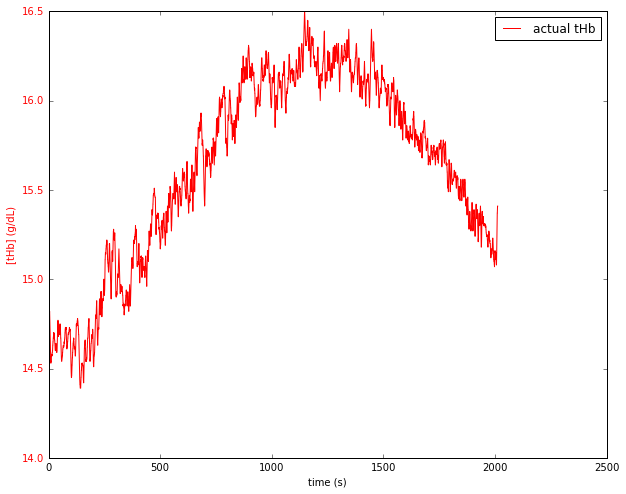

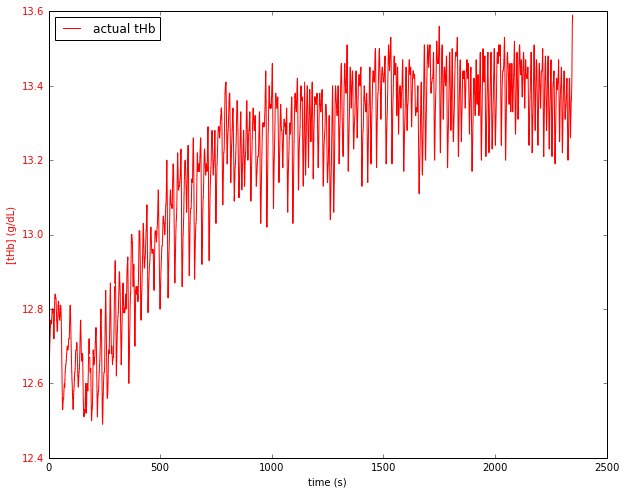

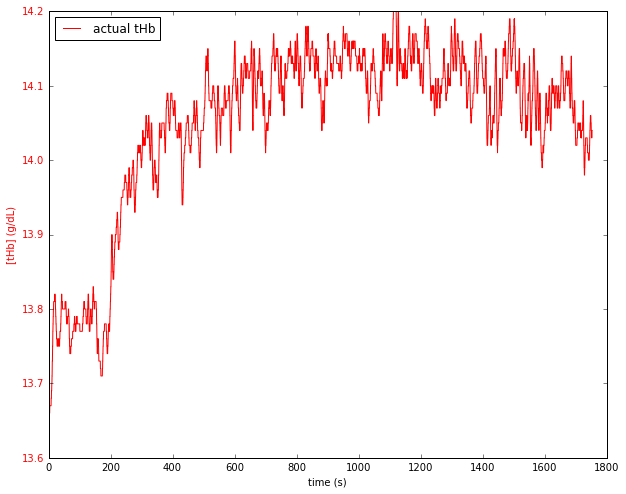

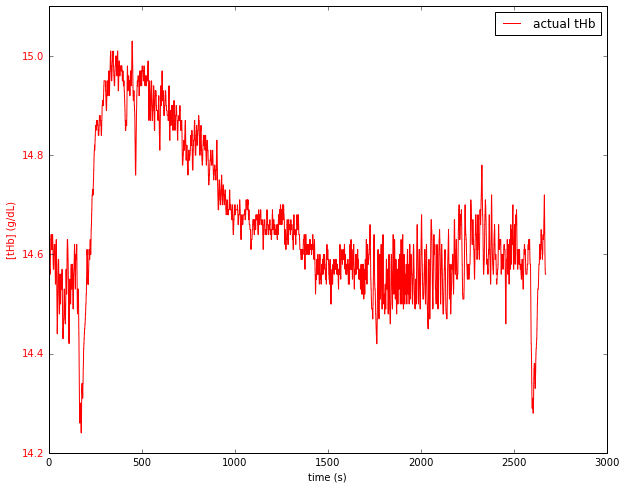

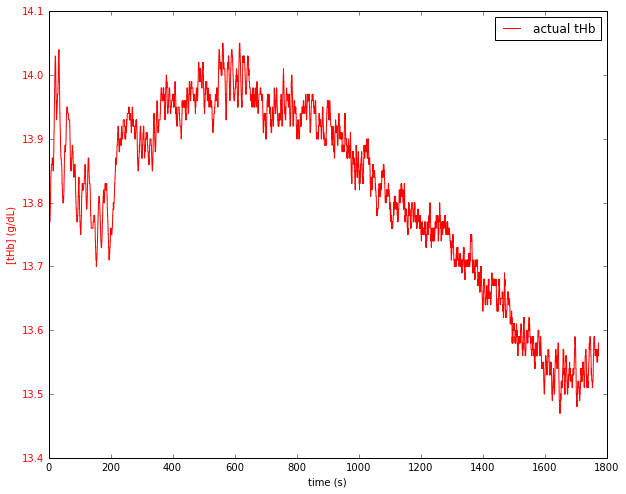

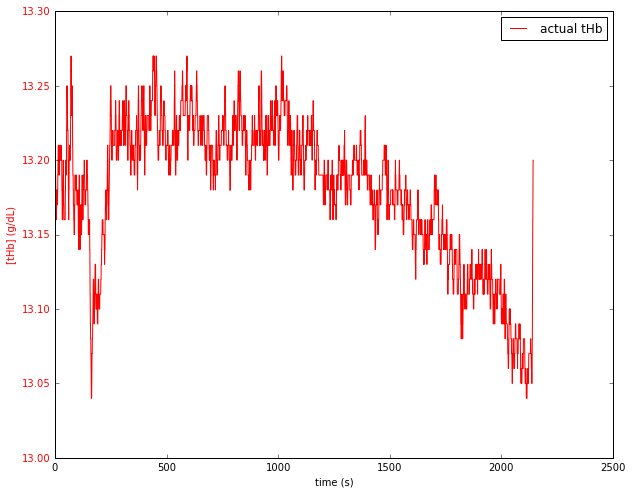

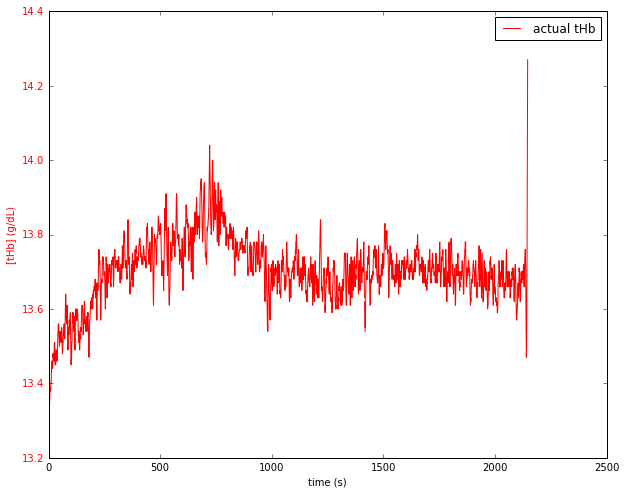

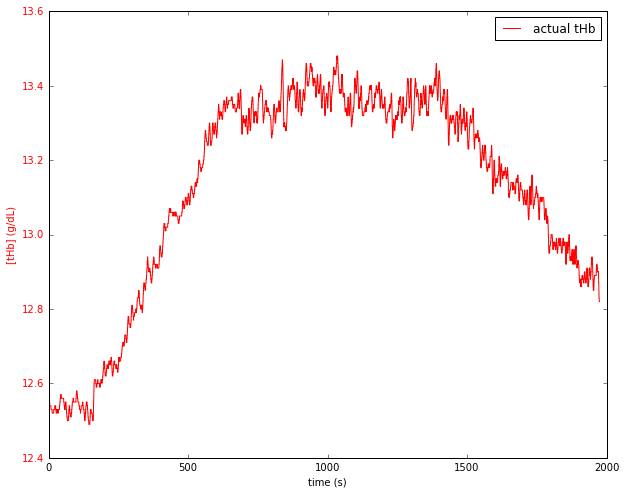

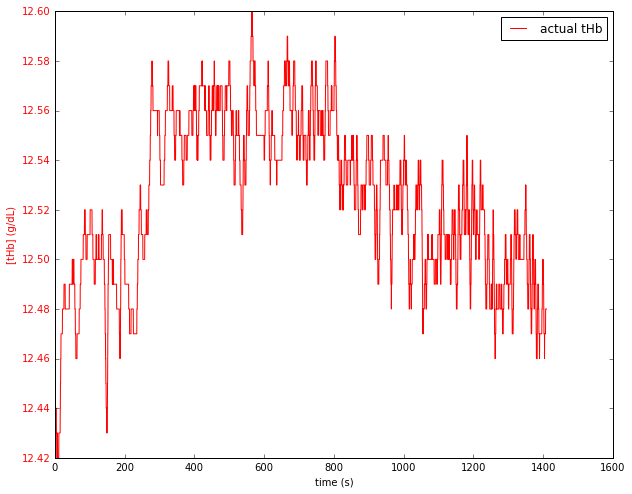

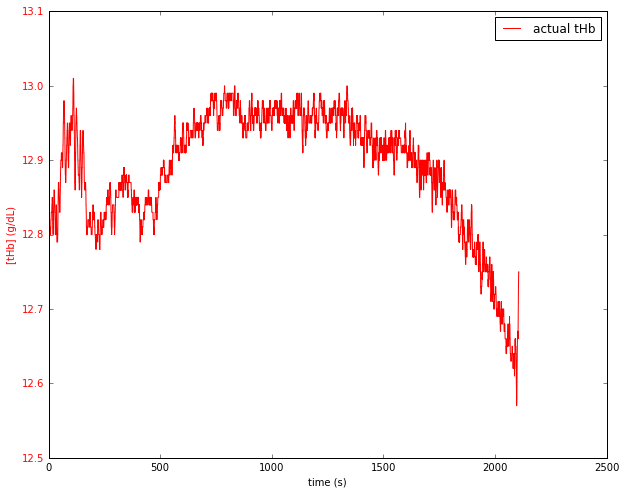

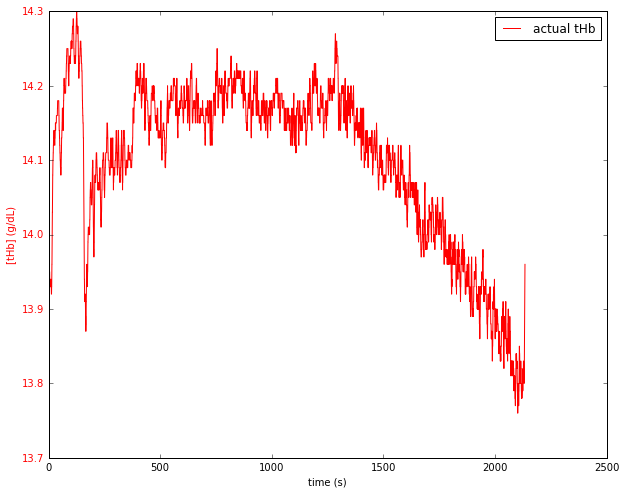

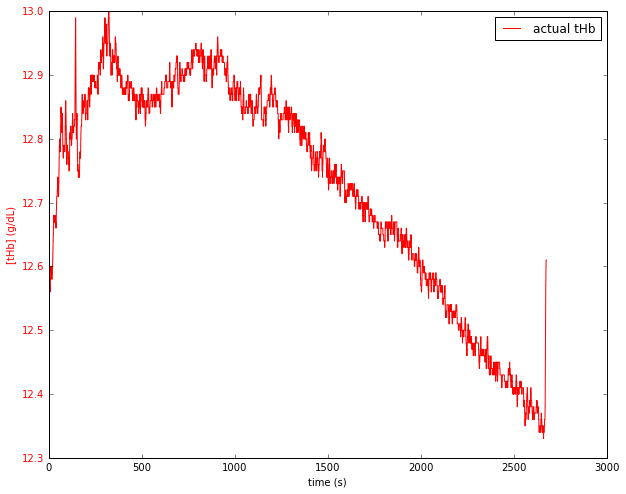

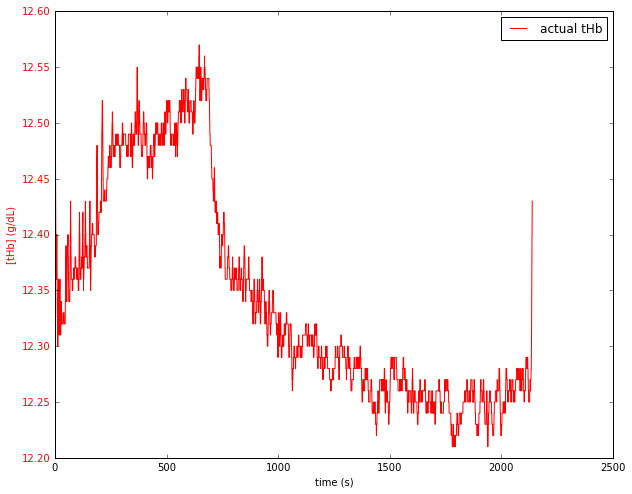

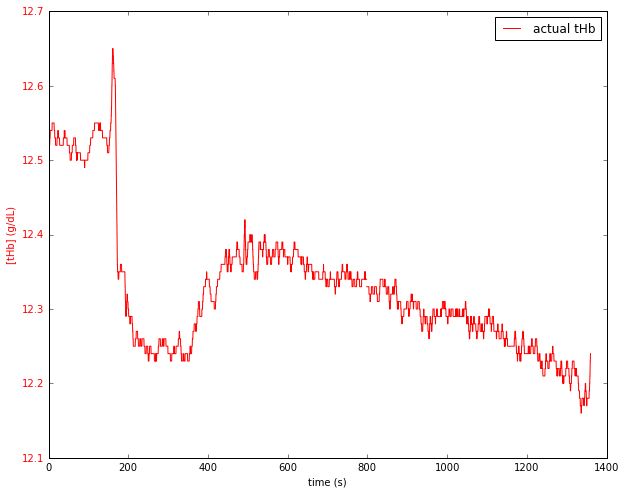

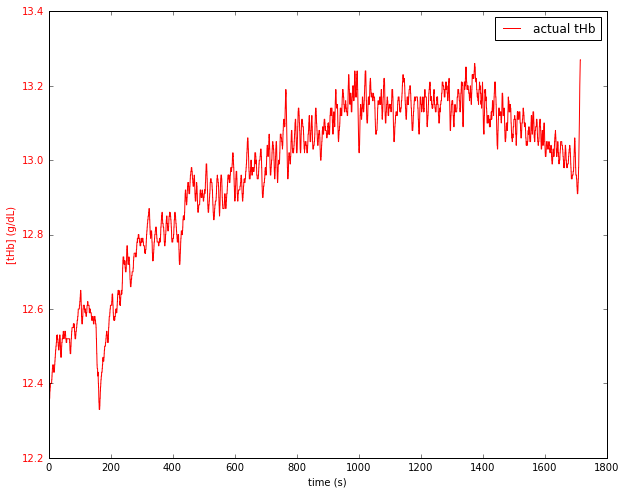

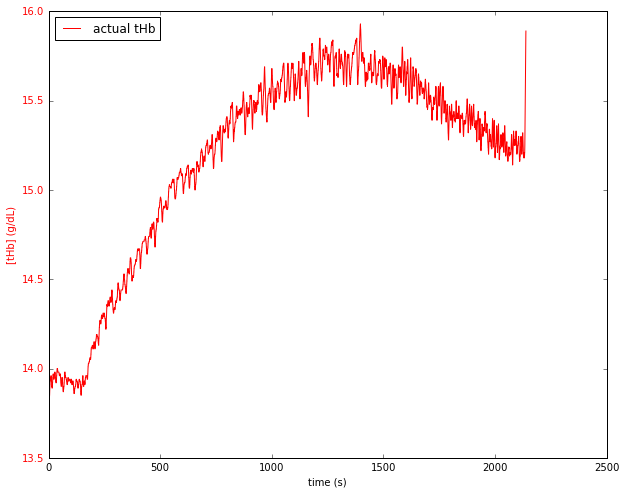

In [4]:
# Plot remaining assessments.
good_list = []
t_predicted = []
t_actual = []
good_cnt = 0
for assess_id in data.keys():
    tHb = data[assess_id][key_type]['tHb'][start_idx:end_idx]
    fig, ax1 = plt.subplots()
    x2 = np.arange(0, len(tHb)) / 5
    ax1.plot(x2, tHb, 'r-', label='actual tHb')   
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('[tHb] (g/dL)', color='red')
    ax1.legend()
    for tl in ax1.get_yticklabels():
        tl.set_color('red')

    # Fit a 4th-order polynomial to the tHb curve, first 4 stages.
    # Window is +/- 3 minutes.
    t_cutoff = 900    
    end_sample = 3600
    y = tHb[:end_sample]
    x = np.arange(len(y))
    z = np.polyfit(x, y, deg=4)
    fit = np.polyval(z, np.arange(len(tHb)))
    max_tHb_actual = tHb.argmax()
    max_tHb_predicted = fit.argmax()
    if abs(max_tHb_actual - max_tHb_predicted) <= t_cutoff:
        good_cnt += 1
        t_actual.append(max_tHb_actual)
        t_predicted.append(max_tHb_predicted)
    
        ax2 = ax1.twinx()
        ax2.plot(x2, fit, 'm-', label='predicted tHb')
        ax2.set_ylabel('[tHb] (g/dL)', color='magenta')
        ax2.legend()
        for tl in ax2.get_yticklabels():
            tl.set_color('magenta')
        
        plt.title('Actual and Predicted [tHb] for LT Assessments')
        out_file = os.path.join(out_dir, assess_id + '.png')
        plt.savefig(out_file)
        plt.close()
        good_list.append(assess_id)
    
plt.title('Total Assessment Time vs. Time to Maximum [tHb] (predicted)')
plt.xlabel('[tHb](max) predicted time (s)')
plt.ylabel('[tHb](max) actual time (s)')
plt.scatter(t_predicted, t_actual, color='blue')    
out_file = os.path.join(out_dir, 'tHb_predicted_time.png')
plt.savefig(out_file)
plt.close()
    
good_list.sort()
excluded_list.sort()
missing_list.sort()
bad_HR_list.sort()
with open(os.path.join(out_dir, 'good_LT_tHb_warmup.txt'), 'a') as fn:
    for line in good_list:
        fn.write(line + '\n')

with open(os.path.join(out_dir, 'excluded_LT_tHb_warmup.txt'), 'a') as fn:
    for line in excluded_list:
        fn.write(line + '\n')

with open(os.path.join(out_dir, 'missing_LT_tHb_warmup.txt'), 'a') as fn:
    for line in missing_list:
        fn.write(line + '\n')

with open(os.path.join(out_dir, 'bad_HR_LT_tHb_warmup.txt'), 'a') as fn:
    for line in bad_HR_list:
        fn.write(line + '\n')